<a href="https://colab.research.google.com/github/ShirishaP/ML-Assignments/blob/main/Analysis_on_Zomato_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis on Zomato data set**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
df = pd.read_csv("/content/gdrive/My Drive/DataSets/zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [7]:
df.shape

(51717, 17)

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

From the data set we can see, we do not need the URL, phone number of the users and complete address as we can consider only location here.

In [11]:
df1 = df.copy()
columns_to_be_removed=['url','address','phone']
df1=df1.drop(columns_to_be_removed,axis=1)

In [100]:
#For rating there are some null and other values and need to format it 
df1['rate'] = df1['rate'].replace('NEW',np.NaN)
df1['rate'] = df1['rate'].replace('-',np.NaN)
df1.dropna(how = 'any', inplace = True)


In [101]:
df1['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51705    3.8 /5
51707    3.9 /5
51708    2.8 /5
51711    2.5 /5
51715    4.3 /5
Name: rate, Length: 23259, dtype: object

In [102]:
df1['rate'] = df1['rate'].astype(str)
df1['rate'] = df1['rate'].apply(lambda r: r.replace('/5',''))
df1['rate'] = df1['rate'].apply(lambda r: float(r))
df1['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23259, dtype: float64

In [104]:
df1['rate'].value_counts()

3.9    3250
4.0    2903
4.1    2830
3.8    2484
4.2    2125
4.3    1681
3.7    1646
4.4    1142
3.6     878
4.5     648
3.5     482
3.4     351
2.8     321
2.9     313
3.1     307
4.6     300
3.0     291
3.2     250
3.3     219
2.7     190
4.7     167
2.6     138
4.8      66
2.5      57
4.9      55
2.4      54
2.3      45
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [106]:
df1.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [107]:
restaurants = df1['name'].value_counts()[0:10]
restaurants

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Name: name, dtype: int64

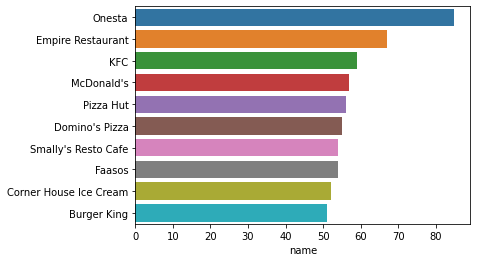

In [108]:

sns.barplot(x=restaurants,y=restaurants.index)
 # Here we can see orders are done more from Onesta

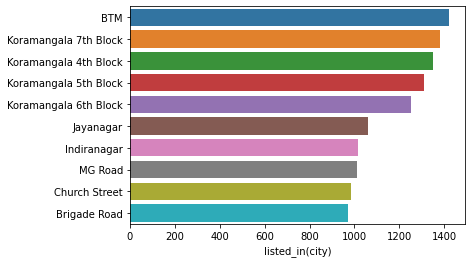

In [152]:
location = df1['listed_in(city)'].value_counts()[0:10]
sns.barplot(x=location,y=location.index) #top 10 locations where orders are more

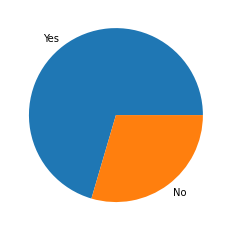

In [109]:
#Let us see how many restaurants have online orders
online_orders = df1['online_order'].value_counts()
plt.pie(online_orders, labels=online_orders.index)
plt.show()


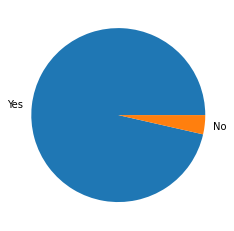

In [110]:
#Let us see how many top restaurants have online orders 
popular_restaurants = df1['name'].value_counts()[:10].index
df_popular = df1[df1['name'].isin(popular_restaurants)]
online_order_top = df_popular['online_order'].value_counts()
plt.pie(online_order_top, labels=online_order_top.index)
plt.show()  


Here we can see the most ordered restaurants mostly accept online orders that might be the reason why people are ordering from them frequently

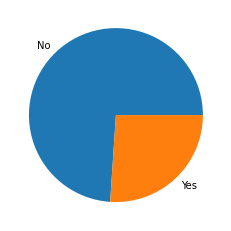

In [111]:
book_table = df1['book_table'].value_counts()
plt.pie(book_table, labels=book_table.index)
plt.show()

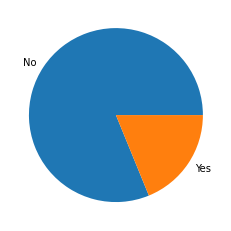

In [112]:
popular_restaurants = df1['name'].value_counts()[:10].index
df_popular = df1[df1['name'].isin(popular_restaurants)]
book_table_top = df_popular['book_table'].value_counts()
plt.pie(book_table_top, labels=book_table_top.index)
plt.show() 


In [113]:
df1['cuisines'].value_counts().head()


North Indian                           1152
North Indian, Chinese                   779
South Indian                            366
Cafe                                    285
South Indian, North Indian, Chinese     233
Name: cuisines, dtype: int64

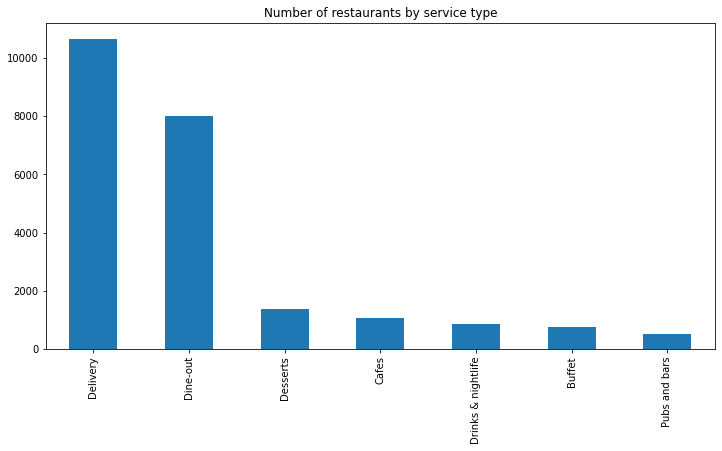

In [119]:
df1['listed_in(type)'].value_counts().plot(kind = 'bar', figsize = (12,6),title = 'Number of restaurants by service type')


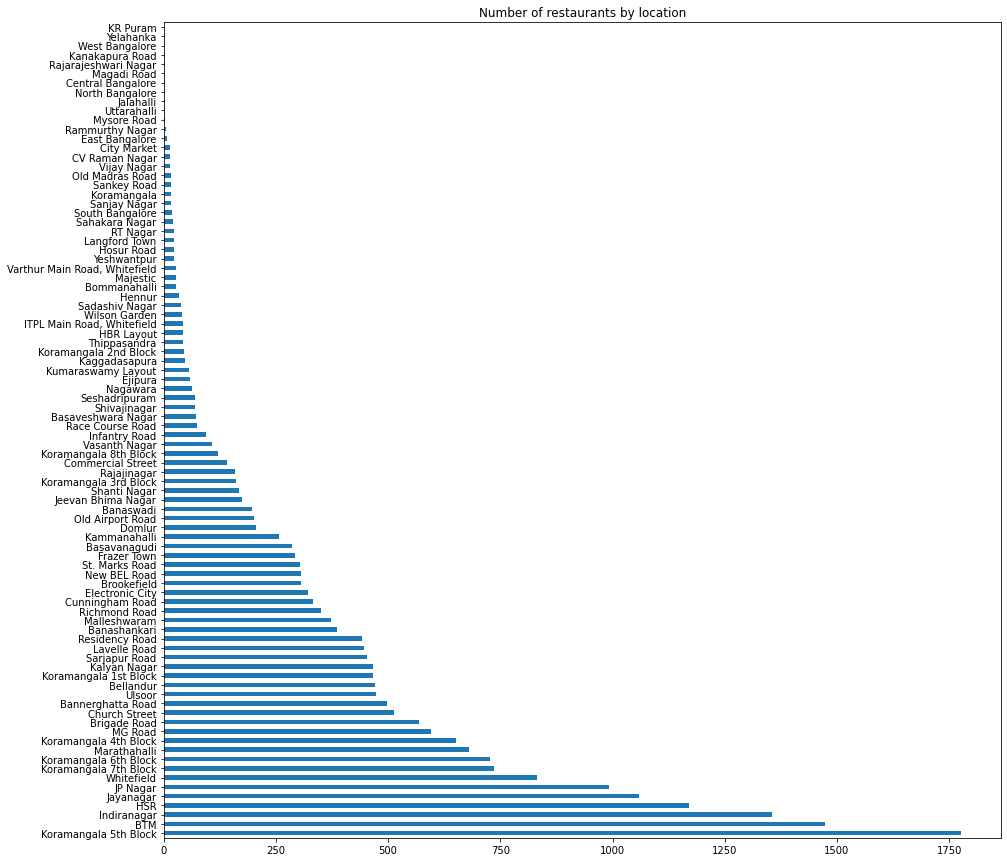

In [125]:
df1['location'].value_counts().plot(kind = 'barh', figsize = (15,15), title = 'Number of restaurants by location')

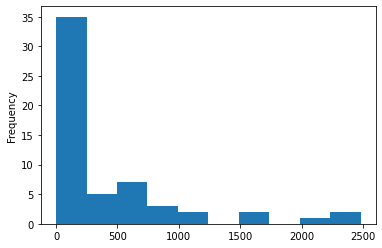

In [124]:
df1['approx_cost(for two people)'].value_counts().plot(kind = 'hist')


In [ ]:
df1['approx_cost(for two people)']= df1['approx_cost(for two people)'].astype(str)
df1['approx_cost(for two people)'] = df1['approx_cost(for two people)'].apply(lambda r: r.replace(',',''))
df1['approx_cost(for two people)'] = df1['approx_cost(for two people)'].apply(lambda r: float(r))

In [135]:

df2 = df1.loc[(df1.book_table == 'Yes') & (df1.rate > 4.0), ['name', 'rate','approx_cost(for two people)']]
df2.head()

,name,rate,approx_cost(for two people)
0,Jalsa,4.1,800.0
7,Onesta,4.6,600.0
11,Cafe Shuffle,4.2,600.0
12,The Coffee Shack,4.2,500.0
44,Onesta,4.6,600.0


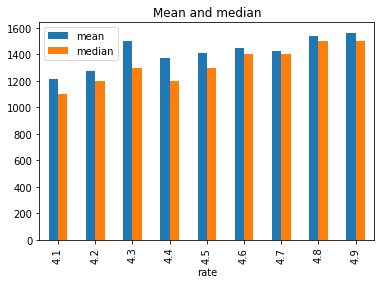

In [136]:


df2.groupby(['rate'])['approx_cost(for two people)'].agg(['mean','median']).plot(kind = 'bar',title="Mean and median for restaurants rated above 4")

In [138]:
#top rated and cheapest restaurants
top_rated_cheap = df2.loc[(df2.rate > 4.5) & (df2['approx_cost(for two people)'] < 1000), ['name','rate', 'approx_cost(for two people)']]
top_rated_cheap

,name,rate,approx_cost(for two people)
7,Onesta,4.6,600.0
44,Onesta,4.6,600.0
557,Onesta,4.6,600.0
2497,Onesta,4.6,600.0
2584,Onesta,4.6,600.0
3293,Onesta,4.6,600.0
6995,Onesta,4.6,600.0
16975,Baar Union,4.6,850.0
17490,Baar Union,4.6,850.0
17501,Baar Union,4.6,850.0


In [139]:
top_rated_cheap.name.unique() # These are the restaturants which are highly rated but cheap price

array(['Onesta', 'Baar Union', 'Zamindar'], dtype=object)

In [141]:
df3 = df1.loc[ (df1.rate > 4.0), ['name', 'rate','approx_cost(for two people)','listed_in(city)']]
df3.head()

,name,rate,approx_cost(for two people),listed_in(city)
0,Jalsa,4.1,800.0,Banashankari
1,Spice Elephant,4.1,800.0,Banashankari
7,Onesta,4.6,600.0,Banashankari
9,Smacznego,4.2,550.0,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,4.1,500.0,Banashankari


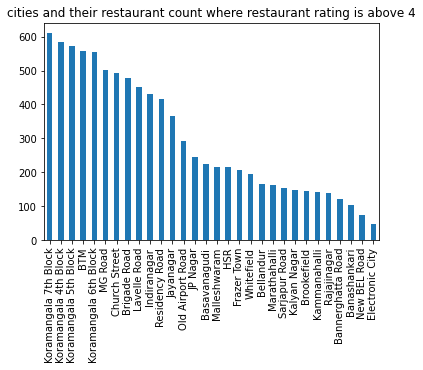

In [147]:
df3['listed_in(city)'].value_counts().plot(kind = 'bar',title="cities and their restaurant count where restaurant rating is above 4")

Conculsions:
1. 'Onesta', 'Baar Union', 'Zamindar' are the restaurants which are highly rated but have a cheap price
2. Most of the top restaurants which is repetitive has online orders
3. Dine-out and delivery type restaurants are more when compared to others.


